In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('sab-bma.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGCGCCGACGAATCGGTCTCCATGCCGTTTCTC...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGGGAGGGCCTACCAAATAGGTTCCTCCTCCCGTAGTAT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGGG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGAGGAGTAAGCGACA...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTACGCCAGACATTTTGTTA...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTGCGTCCGCCAATTAACGGTTGCTAGTATA...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTAGCATGGGCACGCAATTCCCAA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGCCTCGAC...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2021basic/bin/universal-darwin'

In [9]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]



100%|██████████| 10000/10000 [00:00<00:00, 69951.12it/s]


[0, 1, 6, 13, 24, 37, 63, 102, 145, 213, 264, 322, 426, 502, 614, 714, 842, 950, 1092, 1234, 1422, 1518, 1659, 1787, 2011, 2172, 2390, 2525, 2736, 2865, 3062, 3238, 3391, 3504, 3693, 3781, 4001, 4086, 4249, 4385, 4548, 4679, 4773, 4951, 5052, 5181, 5221, 5336, 5454, 5573, 5622, 5761, 5779, 5932, 5890, 6008, 5905, 5792, 5797, 5723, 5632, 5586, 5473, 5441, 5281, 5144, 5046, 5007, 4895, 4783, 4626, 4518, 4332, 4203, 4089, 3916, 3762, 3600, 3415, 3306, 3073, 2901, 2683, 2549, 2411, 2223, 2029, 1889, 1751, 1544, 1406, 1234, 1075, 967, 813, 712, 612, 506, 461, 344, 279, 182, 151, 94, 61, 43, 19, 10, 4, 3]


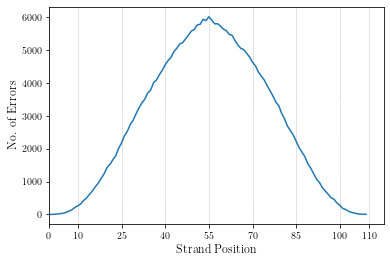

In [10]:
# Hamming Distance Graph
strand_len = 110
count_pos = [0] * (strand_len + 1)

def hamming(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    hamming(ref_strands[i], noisy_strands[i])

print(count_pos[:-1])
f = plt.figure()
plt.plot(range(strand_len), count_pos[:-1])
plt.xlabel(r'Strand Position', fontsize=12)
plt.ylabel(r'No. of Errors', fontsize=12)
plt.grid(axis = 'x', linestyle='--', linewidth = 0.5)
plt.xlim(0, 115)
plt.xticks([0, 10, 25, 40, 55, 70, 85, 100, 110])
plt.show()
f.savefig('cov5-sab-bma-hamming.pdf', bbox_inches='tight')

In [11]:
pairs = []
pairs_no_pos = []

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 10000/10000 [00:12<00:00, 786.50it/s]


In [12]:

subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)


ATTC ->  6
TG -> AAA 6
C -> GTG 6
GGT -> AA 6
 -> TAGT 6
CATG ->  6
GGTT -> C 6
 -> TCAA 6
CAC ->  6
 -> TCAT 6
 -> TAGA 6
GT -> ACA 6
C -> AAAA 6
GGTA ->  6
 -> ACACA 6
 -> ACTA 6
GTT -> CA 6
AGCT ->  6
G -> ATC 6
T -> AGG 6
 -> GAGC 6
 -> AGCG 6
CTTT ->  6
ATCC ->  6
GCTC ->  6
GTTA ->  6
ATCT ->  6
TACC ->  6
TT -> GG 6
TC -> AG 6
 -> CAACA 6
CGTG ->  6
 -> CGGG 6
CTT -> AA 6
 -> CATC 6
CTAC ->  6
 -> CGAG 6
GC -> TA 6
T -> ACAC 6
TTCC ->  6
CG -> AAA 6
 -> CTAA 6
ATT -> C 6
 -> CACAC 6
 -> ATAT 6
AGTG ->  6
A -> CCC 6
GCGT ->  6
 -> GAAG 6
 -> GTAG 6
GGA -> C 6
GG -> CAC 6
 -> AGACA 6
CGCG ->  6
CTAG ->  6
CTCG ->  6
 -> GCCA 6
GCTT ->  7
 -> GCGC 7
T -> CGG 7
 -> AACG 7
GTTC ->  7
CCTT ->  7
TACT ->  7
AGT -> C 7
 -> CGCC 7
AT -> CG 7
 -> CAGC 7
TA -> GG 7
TGCG ->  7
TAG -> C 7
G -> CCAC 7
AGGT ->  7
G -> CTA 7
C -> AAT 7
GTTG ->  7
CTT -> G 7
GG -> AT 7
AT -> GG 7
 -> CGCA 7
 -> GAAA 7
 -> AGAT 7
 -> CGAC 7
GC -> AT 7
GTGG ->  7
 -> GGGC 7
TCCT ->  7
 -> AGAGA 7
CCG -> A 7
ACA ->

TG ->  @ 30 6
A -> T @ 41 6
C -> A @ 100 6
 -> A @ 6 6
TG ->  @ 59 6
 -> CG @ 47 6
C -> A @ 10 6
CC -> A @ 63 6
TG ->  @ 54 6
 -> GT @ 52 6
C -> T @ 55 6
C -> T @ 57 6
C -> T @ 67 6
T -> GA @ 57 6
 -> G @ 99 6
 -> C @ 9 6
 -> AAA @ 59 6
C -> T @ 66 6
 -> A @ 102 6
C -> A @ 13 6
G -> T @ 48 6
 -> AGC @ 53 6
GC ->  @ 80 6
A -> C @ 73 6
A -> T @ 49 6
 -> AAC @ 56 6
A -> T @ 48 6
 -> AAC @ 53 6
CT ->  @ 77 6
C -> A @ 97 6
G -> T @ 47 6
GC -> A @ 45 6
A -> C @ 82 6
G -> A @ 20 6
C -> A @ 94 6
G -> CA @ 54 6
CT ->  @ 76 6
A -> C @ 88 6
G -> CA @ 56 6
AG ->  @ 53 6
GG ->  @ 73 6
GG ->  @ 72 6
GC -> A @ 58 6
CT ->  @ 90 6
C -> T @ 62 6
C -> A @ 17 6
TGT ->  @ 59 6
G -> CC @ 58 6
C -> A @ 14 6
AG ->  @ 45 6
TG ->  @ 74 6
A -> G @ 68 6
 -> AC @ 65 6
 -> AA @ 42 6
CC ->  @ 47 6
A -> G @ 88 6
 -> AC @ 36 6
C -> T @ 33 6
 -> AA @ 73 6
G -> AA @ 61 6
 -> AA @ 70 6
A -> G @ 81 6
A -> G @ 45 6
A -> G @ 46 6
 -> GG @ 60 6
CC ->  @ 40 6
 -> CC @ 51 6
G -> A @ 99 6
C -> T @ 35 6
G -> AA @ 56 6
G -> T @ 8

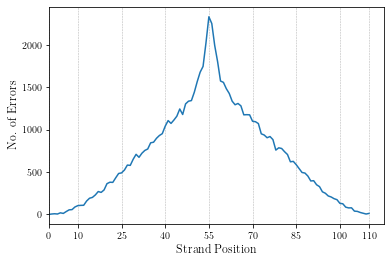

In [13]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]

for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)

strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

f = plt.figure()
plt.plot(range(strand_len + 1), pos_counts)
plt.xlabel(r'Strand Position', fontsize=12)
plt.ylabel(r'No. of Errors', fontsize=12)
plt.grid(axis = 'x', linestyle='--', linewidth = 0.5)
plt.xlim(0, 115)
plt.xticks([0, 10, 25, 40, 55, 70, 85, 100, 110])
plt.show()
f.savefig('cov5-sab-bma-aligned.pdf', bbox_inches='tight')

In [14]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [15]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

In [16]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


[0, 0, 1, 2, 0, 2, 8, 8, 8, 9, 18, 9, 13, 15, 20, 21, 26, 32, 32, 41, 41, 44, 44, 51, 55, 57, 54, 59, 63, 59, 73, 64, 75, 63, 81, 88, 96, 85, 85, 94, 76, 91, 95, 102, 96, 97, 104, 107, 102, 110, 101, 94, 118, 99, 115, 111, 136, 107, 105, 92, 101, 108, 95, 118, 120, 112, 85, 99, 85, 99, 85, 99, 105, 82, 93, 79, 92, 81, 80, 61, 64, 87, 71, 50, 72, 69, 68, 59, 55, 47, 52, 36, 35, 36, 35, 27, 24, 30, 26, 19, 23, 22, 13, 12, 17, 8, 11, 7, 0, 1, 3]
[0, 2, 3, 0, 5, 1, 6, 9, 7, 18, 14, 14, 14, 16, 17, 18, 16, 24, 34, 27, 46, 39, 42, 45, 51, 43, 46, 64, 56, 67, 76, 64, 71, 57, 73, 74, 93, 75, 91, 84, 89, 98, 86, 87, 113, 96, 97, 119, 106, 120, 129, 143, 137, 124, 150, 174, 139, 133, 116, 121, 120, 125, 111, 112, 106, 78, 109, 92, 104, 99, 90, 95, 87, 93, 71, 84, 79, 65, 56, 77, 86, 69, 69, 53, 42, 39, 41, 51, 54, 43, 41, 39, 37, 19, 21, 29, 22, 16, 16, 15, 8, 10, 6, 7, 8, 3, 4, 4, 2, 1, 3]
[0, 0, 1, 0, 2, 2, 2, 4, 4, 10, 11, 12, 10, 19, 12, 24, 15, 20, 19, 31, 26, 37, 31, 27, 37, 48, 46, 43, 47

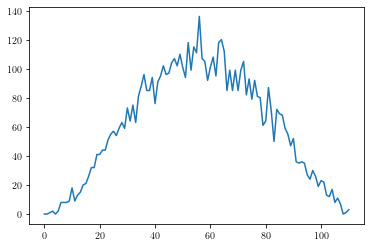

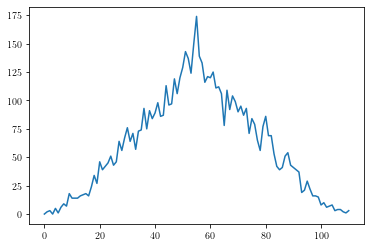

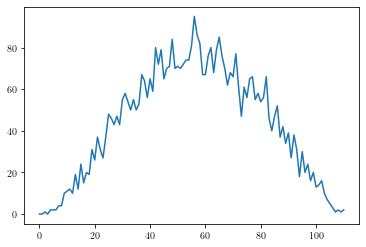

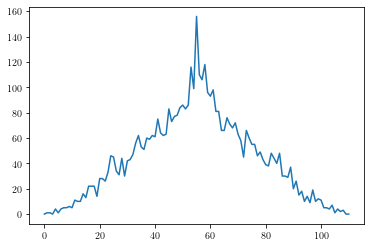

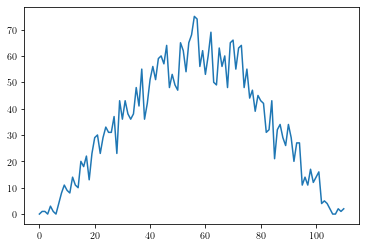

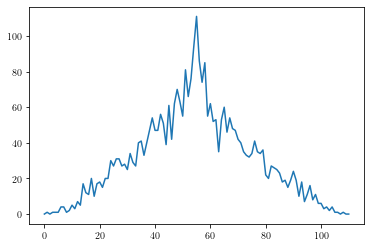

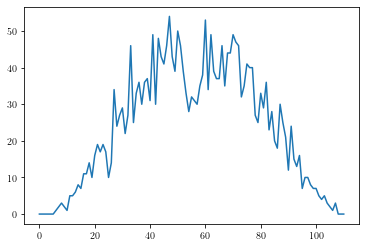

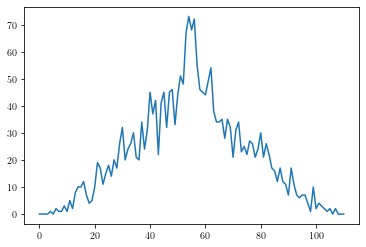

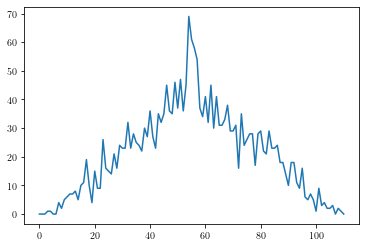

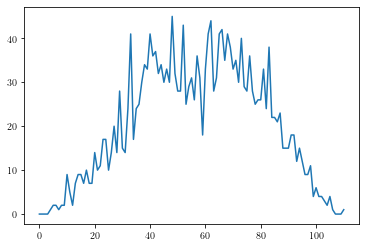

In [17]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    print(pos_map[key])
    plt.plot(range(strand_len + 1), pos_map[key])

In [18]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)